## Problem Definition
Breast cancer is one of the most common types of cancer that starts in the female reproductive system. It occurs in women, but men can get it too. It is the second leading cause of death in women. With the increasing use of data in healthcare, machine learning can be used to predict whether a patient will survive a deadly disease like cancer or not.

## Data Features
We have a dataset of over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:
1. Patient_ID: ID of the patient
2. Age: Age of the patient
3. Gender: Gender of the patient
4. Protein1, Protein2, Protein3, Protein4: expression levels
5. Tumor_Stage: Breast cancer stage of the patient
6. Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
7. ER status: Positive/Negative
8. PR status: Positive/Negative
9. HER2 status: Positive/Negative
10. Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
11. DateofSurgery: The date of Surgery
12. DateofLast_Visit: The date of the last visit of the patient
13. Patient_Status: Alive/Dead

So by using this dataset, our task is to predict whether a breast cancer patient will survive or not after the surgery.






## Data Loading
This dataset was collected from Kaggle. You can download this dataset from here:https://www.kaggle.com/amandam1/breastcancerdataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

data = pd.read_csv("/content/drive/MyDrive/filename/BRCA.csv%3FX-Goog-Algorithm=GOOG4-RSA-SHA256&X-Goog-Credential=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com%2F20230126%2Fauto%2Fstorage%2Fgoog4_request&X-Goog-Date=20230126T011355Z&X-Goog-Expires=259200&X.csv")
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

Let’s have a look at whether the columns of this dataset contains any null values or not:

In [3]:
print(data.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


So this dataset has some null values in each column, I will drop these null values:

In [4]:
data = data.dropna()

Now let’s have a look at the insights about the columns of this data:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

Breast cancer is mostly found in females, so let’s have a look at the Gender column to see how many females and males are there:

In [6]:
print(data.Gender.value_counts())

FEMALE    313
MALE        4
Name: Gender, dtype: int64


As expected, the proportion of females is more than males in the gender column. Now let’s have a look at the stage of tumour of the patients:

## Data Visualization

In [7]:
# Tumour Stage
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

So most of the patients are in the second stage. Now let’s have a look at the histology of breast cancer patients. (Histology is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread):

In [8]:
# Histology
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Histology of Patients")
figure.show()

Now let’s have a look at the values of ER status, PR status, and HER2 status of the patients:

In [9]:
# ER status
print(data["ER status"].value_counts())
# PR status
print(data["PR status"].value_counts())
# HER2 status
print(data["HER2 status"].value_counts())

Positive    317
Name: ER status, dtype: int64
Positive    317
Name: PR status, dtype: int64
Negative    288
Positive     29
Name: HER2 status, dtype: int64


Now let’s have a look at the type of surgeries done to the patients:



In [10]:
# Surgery_type
surgery = data["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Type of Surgery of Patients")
figure.show()

So we explored the data, the dataset has a lot of categorical features. To use this data to train a machine learning model, we need to transform the values of all the categorical columns. Here is how we can transform values of the categorical features:

In [11]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          1          1          1            2             2   
1             2          3          1          1            2             3   
2             3          1          1          1            2             1   
3             2          1          1          1            2             2   
4             2          1          1          1            2             1   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       15-Jan-17          19-Ju

## Breast Cancer Survival Prediction Model
We can now move on to training a machine learning model to predict the survival of a breast cancer patient. Before training the model, we need to split the data into training and test set:

In [13]:
# Splitting data
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Now we can train the machine learning model

In [14]:
# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [16]:
# put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
        "Support Vector Classifier":SVC(),
       "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # make  a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    
    return model_scores
    

In [17]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/vali

{'Logistic Regression': 0.828125,
 'KNN': 0.78125,
 'Support Vector Classifier': 0.828125,
 'Random Forest': 0.828125}

## Model Comparison

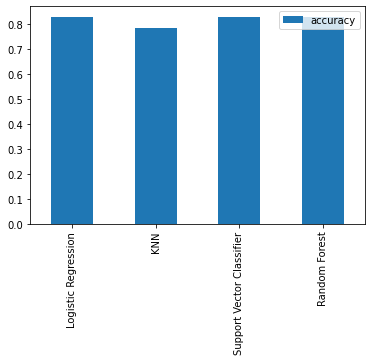

In [18]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

We can see that Logistic Regression,SVC,Random Forestmodels are performing much better than the KNN model with a percentage of 82%.We can therefore perform a hyper-parameter tuning to one of them starting by Logistic Regression then evaluate our model thereafter after tuning them.

In [19]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

In [20]:
# Tune logisticRegression

np.random.seed(42)

# Setup random hyperparameters search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [22]:
rs_log_reg.score(x_test,y_test)

0.828125

Now let’s input all the features that we have used to train this machine learning model and predict whether a patient will survive from breast cancer or not to our tuned model.

In [23]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(rs_log_reg.predict(features))

['Alive']


## Conclusion
So this is how we can use machine learning for the task of breast cancer survival prediction. As the use of data in healthcare is very common today, we can use machine learning to predict whether a patient will survive a deadly disease like breast cancer or not.